In [70]:
library(sp)
library(maps)
library(rgdal)
library(dplyr)
library(scales)
library(rgeos)
library(geosphere)
library(rmapshaper)

## Provinces et territoires

Téléchargement du fichier SHP contenant les limites des provinces et des territoires

    wget http://www12.statcan.gc.ca/census-recensement/2011/geo/bound-limit/files-fichiers/gpr_000b11a_f.zip

In [71]:
gpr_000b11a_f <- readOGR("donnees/provinces/gpr_000b11a_f.shp",encoding = 'ISO-8859-1') %>% ms_simplify()

OGR data source with driver: ESRI Shapefile 
Source: "donnees/provinces/gpr_000b11a_f.shp", layer: "gpr_000b11a_f"
with 13 features
It has 6 fields


Données tabulaires contenues dans le fichier SHP

In [72]:
gpr_000b11a_f@data

PRIDU PRNOM                                              
0  59    British Columbia / Colombie-Britannique            
1  24    Quebec / Québec                                    
2  62    Nunavut                                            
3  11    Prince Edward Island / Île-du-Prince-Édouard       
4  47    Saskatchewan                                       
5  60    Yukon                                              
6  46    Manitoba                                           
7  35    Ontario                                            
8  13    New Brunswick / Nouveau-Brunswick                  
9  61    Northwest Territories / Territoires du Nord-Ouest  
10 48    Alberta                                            
11 10    Newfoundland and Labrador / Terre-Neuve-et-Labrador
12 12    Nova Scotia / Nouvelle-Écosse                      
   PRFNOM                    PRFABREV PRANOM                    PRAABREV
0  Colombie-Britannique      C.-B.    British Columbia          B.C.    
1  Québec                    Qc       Quebec                    Que.    
2  Nunavut                   Nt       Nunavut                   Nvt.    
3  Île-du-Prince-Édouard     Î.-P.-É. Prince Edward Island      P.E.I.  
4  Saskatchewan              Sask.    Saskatchewan              Sask.   
5  Yukon                     Yn       Yukon                     Y.T.    
6  Manitoba                  Man.     Manitoba                  Man.    
7  Ontario                   Ont.     Ontario                   Ont.    
8  Nouveau-Brunswick         N.-B.    New Brunswick             N.B.    
9  Territoires du Nord-Ouest T.N.-O.  Northwest Territories     N.W.T.  
10 Alberta                   Alb.     Alberta                   Alta.   
11 Terre-Neuve-et-Labrador   T.-N.-L. Newfoundland and Labrador N.L.    
12 Nouvelle-Écosse           N.-É.    Nova Scotia               N.S.    
   rmapshaperid
0   0          
1   1          
2   2          
3   3          
4   4          
5   5          
6   6          
7   7          
8   8          
9   9          
10 10          
11 11          
12 12

Extraction des coordonnées limites de chacune des provinces

In [73]:
bbox_prov <- lapply(gpr_000b11a_f@polygons, bbox)

Sélection des limites de l'Alberta et affichage des polygones

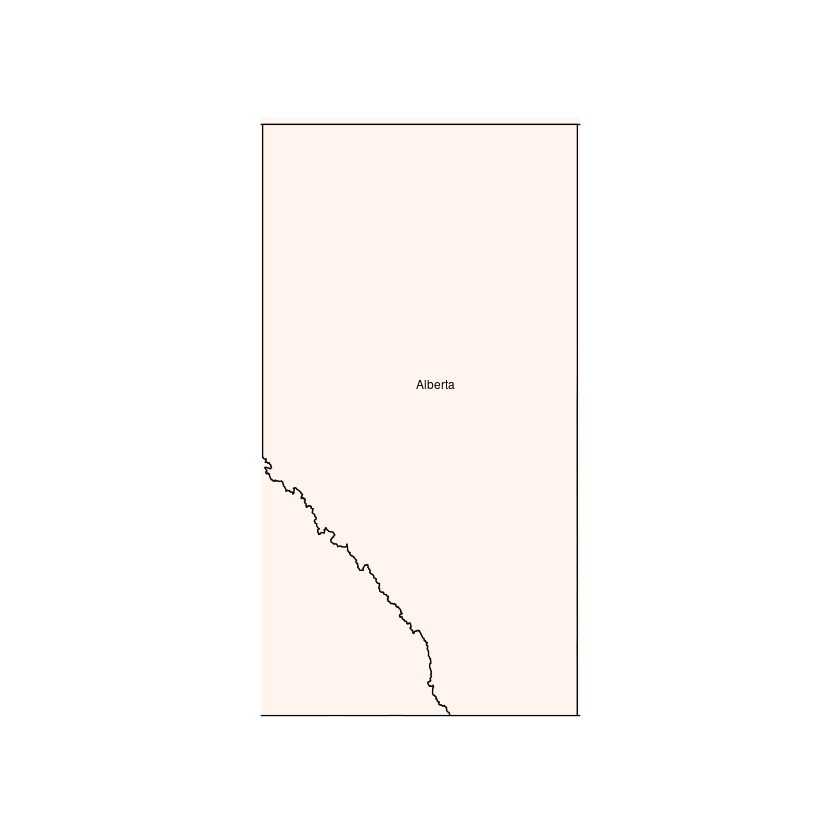

In [74]:
bbox_prov_alberta <- bbox_prov[gpr_000b11a_f@data$PRNOM=="Alberta"][[1]]

map(gpr_000b11a_f,fill = TRUE, col = 'seashell',namefield = 'PRFNOM',
    xlim=c(bbox_prov_alberta[1,1],bbox_prov_alberta[1,2]),
    ylim=c(bbox_prov_alberta[2,1],bbox_prov_alberta[2,2]))
invisible(text(coordinates(gpr_000b11a_f),
               labels=as.character(gpr_000b11a_f$PRFNOM),
               cex=0.6))

## Parcs nationaux

Source des données:

    mkdir donnees/limites_parcs_nationaux
    cd donnees/limites_parcs_nationaux 
    wget http://ftp.cartes.canada.ca/pub/pc_pc/National-parks_Parc-national/national_parks_boundaries/limites_parcs_nationaux.shp.zip
    unzip limites_parcs_nationaux.shp.zip
    rm limites_parcs_nationaux.shp.zip

Je transforme les données des parcs nationaux dans le même système de référence que les polygones des provinces

In [75]:
limites_parcs_nationaux <- spTransform(
    x = rgdal::readOGR("donnees/limites_parcs_nationaux/limites_parcs_nationaux.shp"),
    CRSobj = CRS(proj4string(gpr_000b11a_f))) %>% ms_simplify()

OGR data source with driver: ESRI Shapefile 
Source: "donnees/limites_parcs_nationaux/limites_parcs_nationaux.shp", layer: "limites_parcs_nationaux"
with 47 features
It has 7 fields
Integer64 fields read as strings:  OBJECTID 


Données tabulaires contenues dans le fichier SHP des parcs nationaux

In [76]:
limites_parcs_nationaux@data

OBJECTID Shape_Leng Shape_Area  globalid                              
0  1         399100.63   521622672 {F5BD4565-8591-41AA-99E4-7A6F41E47A09}
1  2          86148.58   187215384 {DCB2DCFE-17BC-4DFA-BE9C-FE9A4624FCA4}
2  3         239712.76  1331729306 {106EEED8-DDC6-447B-9226-006507154D40}
3  4         313783.71   764739692 {B2A0614F-A228-4244-9BCC-6B9B96433447}
4  5         814277.44 10942527257 {B8B6DB08-8E91-4216-9D19-982A7E857920}
5  6         282894.28  3827306859 {D365A5E5-1ED3-4BAF-9DDF-232A5E5EA4B9}
6  7          83392.95   259236547 {571E0061-18B4-4485-9072-7138D567A683}
7  8         574328.45 10924352608 {C52E5D05-7345-42F8-8377-FEE3D4A7F522}
8  9         134090.44   498878286 {615C33BF-A6D6-4B69-8317-436C1D03FBD1}
9  10         74399.91   211648312 {EB67B4F3-0C53-45F9-974B-3BE819D84BCA}
10 11        145056.93   546631833 {F4D2C860-F422-4A44-84C5-2A4BA233DFE6}
11 12        762246.23    95866783 {9290F5AD-5FD3-4A6C-A777-BDF080AD924A}
12 13        361707.33  1860082905 {AFD5D06C-3740-43CF-A3C2-3BE738AED300}
13 14        103792.51    31184813 {CA4BBEAD-3BA3-4B9B-82C1-1CC1EFDCAFB4}
14 15        524862.27  1257873345 {A0AC46C1-8A41-4718-AFA7-A0BC689B087B}
15 16        624231.91 11827725094 {E125CA8E-DCD5-4640-90A5-533BDFB19B8D}
16 17        632131.31 17853403254 {FF705D51-F6F2-4CD6-84C6-E57AF223C39C}
17 18        541881.60  4607855048 {60AB71D9-F267-4A78-B61F-844D5E4D0D17}
18 19        149762.52   161656326 {2EFC258D-7344-4EBE-8BF4-A8B200942C98}
19 20         70694.38   117124125 {3EB03934-6824-4097-B1A4-74E688A9C49F}
20 21         26326.70    16075792 {81607DCE-BD39-41E3-ADEE-C371D4667D7B}
21 22        422768.76  1799122547 {B577C7C8-F927-4C3A-A6B5-6DA9DCF1101A}
22 23       2124790.50  9180689134 {B4CFB708-8ABD-4198-8340-231965E6901B}
23 24         94220.18    14042598 {BC8D02DA-591B-4BA2-A34C-814B8C39E755}
24 25         82455.80   397193668 {57653BC7-3C8F-47FA-8414-4E23474C6875}
25 26         35755.34    25322482 {8BEB0C58-98D9-4946-AF21-3514ED879146}
26 27        274964.28  1361036954 {092E9172-2FDC-453D-94F8-26BFF4132FB6}
27 28        197069.12  1268469933 {D7164C4B-1609-4FBF-945B-2864EBBDAAD2}
28 29        747138.11  6738767165 {914676D3-62D7-4ADD-A75C-ABF0607C6564}
29 30        382133.80  3049951157 {691C8725-89CA-47D8-9C1E-69E4A99037CE}
30 31       1167897.57 18397952413 {590D0639-7974-47A1-9795-040E7D405338}
31 32        872045.03 41167722479 {2D2C1EB6-0D7F-4A6D-A77F-31C99E499397}
32 33        811615.27 19625619733 {09D47FA6-A6E7-4082-9813-1D4ED9AF06F3}
33 34       1355170.32 21424060989 {5FDB4A6D-8A01-4728-9BE8-EC005103F54B}
34 35       1778463.99  1439600089 {978ABCB6-206D-47A4-85F7-D1A1E40C4710}
35 36        175418.98    37052584 {F0104540-00C1-4A34-B9A7-AB5F3D0D23D7}
36 37        118096.26   242115530 {4245A9AA-5234-4D5B-A419-D348FEB84526}
37 38       1270941.90 43160601764 {323E3E60-B323-43C9-BE80-ABE621FBEE96}
38 39        108077.13   246232998 {CE0D9EFB-F2AB-4F8B-B03E-44A57D1593C2}
39 40        187503.01    35663421 {2C53DA06-A8E9-4FDE-9834-9FD67647D037}
40 41        370575.29  5547513490 {F5CE7051-831B-4A3F-B820-F72A574C655D}
41 42        553903.31  9260673207 {E02AF2ED-EC14-4FF3-B22F-9EE14C31CF5E}
42 43        602842.41  4106240006 {339112BF-0C82-45B3-B52D-ED44737BF2AC}
43 44        586086.66 15267021368 {2856F646-CF59-40F9-8D43-6E918F32564C}
44 45        296692.13   406346468 {A8D35956-D43F-401A-BF53-797FA1063444}
45 46        188812.32   969640516 {CD356B3C-727E-46AC-96A8-F4A0887D9AF2}
46 47       1135818.33 28316219360 {1C3DDDEF-F7BB-44F7-BFDF-9BCED3036A70}
   precisionh nom_parc_e                                                   
0  100        Pacific Rim National Park Reserve of Canada                  
1  100        Elk Island National Park of Canada                           
2  100        Glacier National Park of Canada                              
3  100        Grasslands National Park of Canada                           
4  100        Jasper National Park of Canada                           

Affichage des polygones des parcs nationaux contenux dans les limites du polygone de l'Alberta

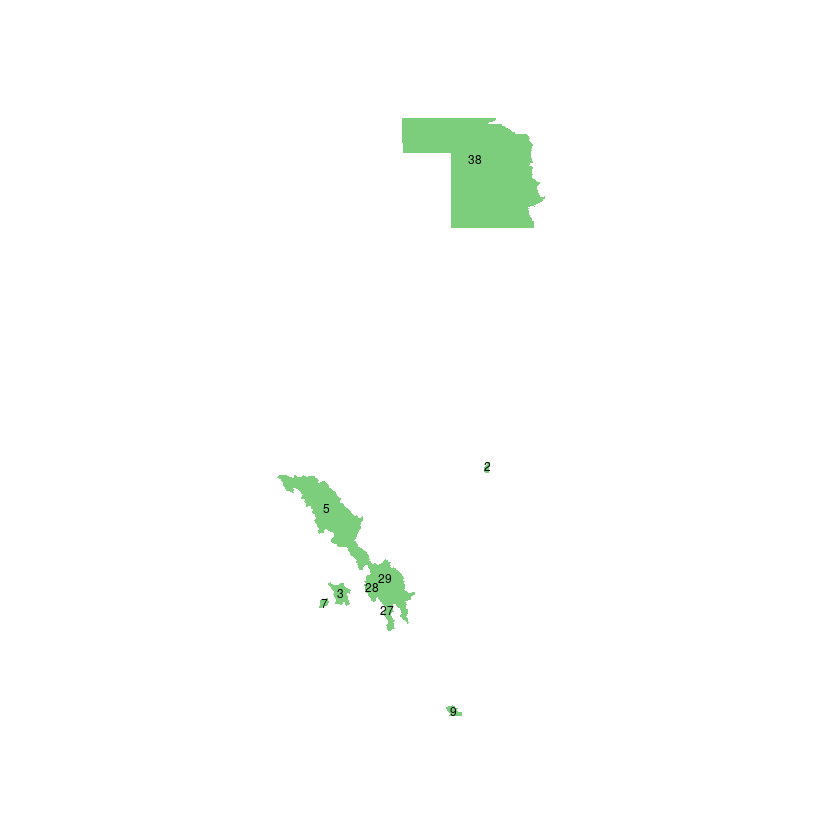

In [77]:
map(limites_parcs_nationaux,
    fill= TRUE,
    col='palegreen3',
    namefield='nom_parc_f',
    border=FALSE,
    xlim=c(bbox_prov_alberta[1,1],bbox_prov_alberta[1,2]),
    ylim=c(bbox_prov_alberta[2,1],bbox_prov_alberta[2,2]))
invisible(text(coordinates(limites_parcs_nationaux),
               labels=as.character(limites_parcs_nationaux$OBJECTID),
               cex=.6))

## Combinaison

On combine les données du polygone de la province avec les données des parcs nationaux

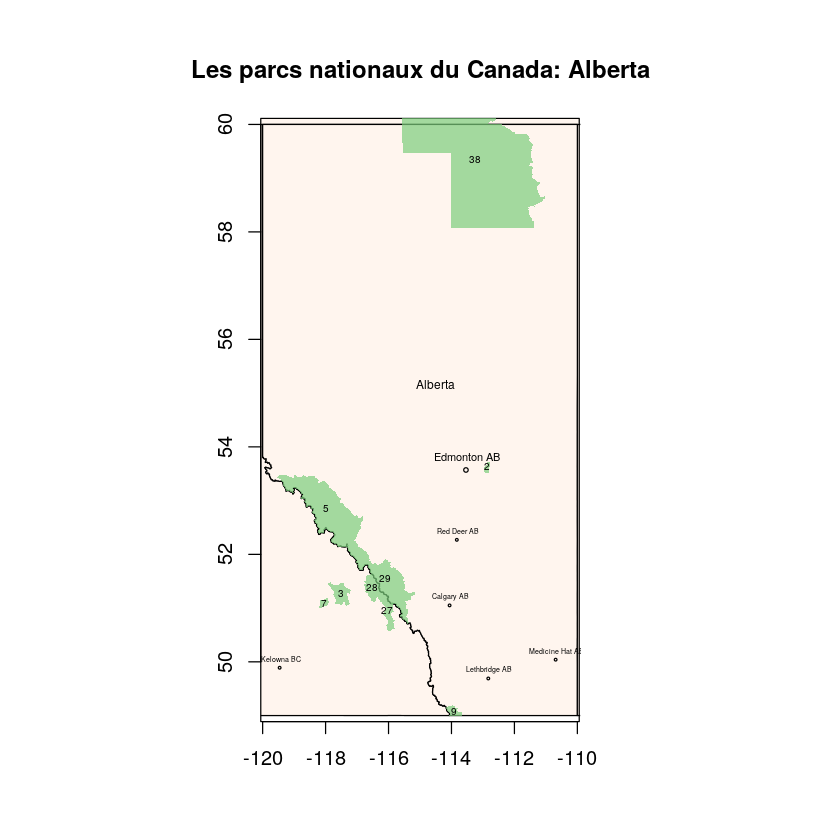

In [78]:
map(database = gpr_000b11a_f,
    fill = TRUE,
    col = 'seashell',
    namefield = 'PRFNOM',
    xlim=c(bbox_prov_alberta[1,1],bbox_prov_alberta[1,2]),
    ylim=c(bbox_prov_alberta[2,1],bbox_prov_alberta[2,2]))
title("Les parcs nationaux du Canada: Alberta")
map.axes()
map.cities(x = canada.cities,capitals=2,cex = 0.5)
map.cities(x = canada.cities,capitals=0,cex = 0.5,minpop = 50000)
plot(limites_parcs_nationaux,
     add = TRUE,
     col = alpha("palegreen3",.7),
     border = FALSE,)
invisible(text(coordinates(gpr_000b11a_f),
               labels=as.character(gpr_000b11a_f$PRFNOM),
               cex=.6))
invisible(text(coordinates(limites_parcs_nationaux),
               labels=as.character(limites_parcs_nationaux$OBJECTID),
               cex=.5))

## Un premier indicateur: distance d'un parc national

In [79]:
onePoint <- SpatialPoints(coordinates(readWKT("POINT(-114.0 50)")),proj4string = CRS(projargs = proj4string(gpr_000b11a_f)))

In [80]:
dist2Line(onePoint, limites_parcs_nationaux)

distance lon       lat      ID
[1,] 88554.93 -113.9718 49.20471 9

## Ressources

- [Making Maps with R](http://www.molecularecologist.com/2012/09/making-maps-with-r/)
- [Topic 2(a): Spatial Data in R](https://science.nature.nps.gov/im/datamgmt/statistics/r/advanced/spatial.cfm)